<font color='green' size='6'>**Домашняя работа 2**</font>  
<font color='#11a642' size='5'>**Тема: Машинное обучение**</font>  
<font size='5'>**Задание:**</font>  

Домашняя работа основана на данных https://archive.ics.uci.edu/dataset/109/wine.


**Что нужно сделать:**

0. Загрузите данные https://archive.ics.uci.edu/dataset/109/wine, например вот так
```
from sklearn.datasets import load_wine  
data = load_wine()


1. Проведите разведочный анализ данных (EDA)

2. Если есть пропуски, заполнить пропуски

3. Уменьшить размерность с помощью PCA до 2 компонент

4. Оцените долю сохраненной дисперсии

5. Постройте scatterplot 1-ой и 2-ой главной компоненты, окрасить точки в зависиости от target (столбец class)







Первые пять строк:
    alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  

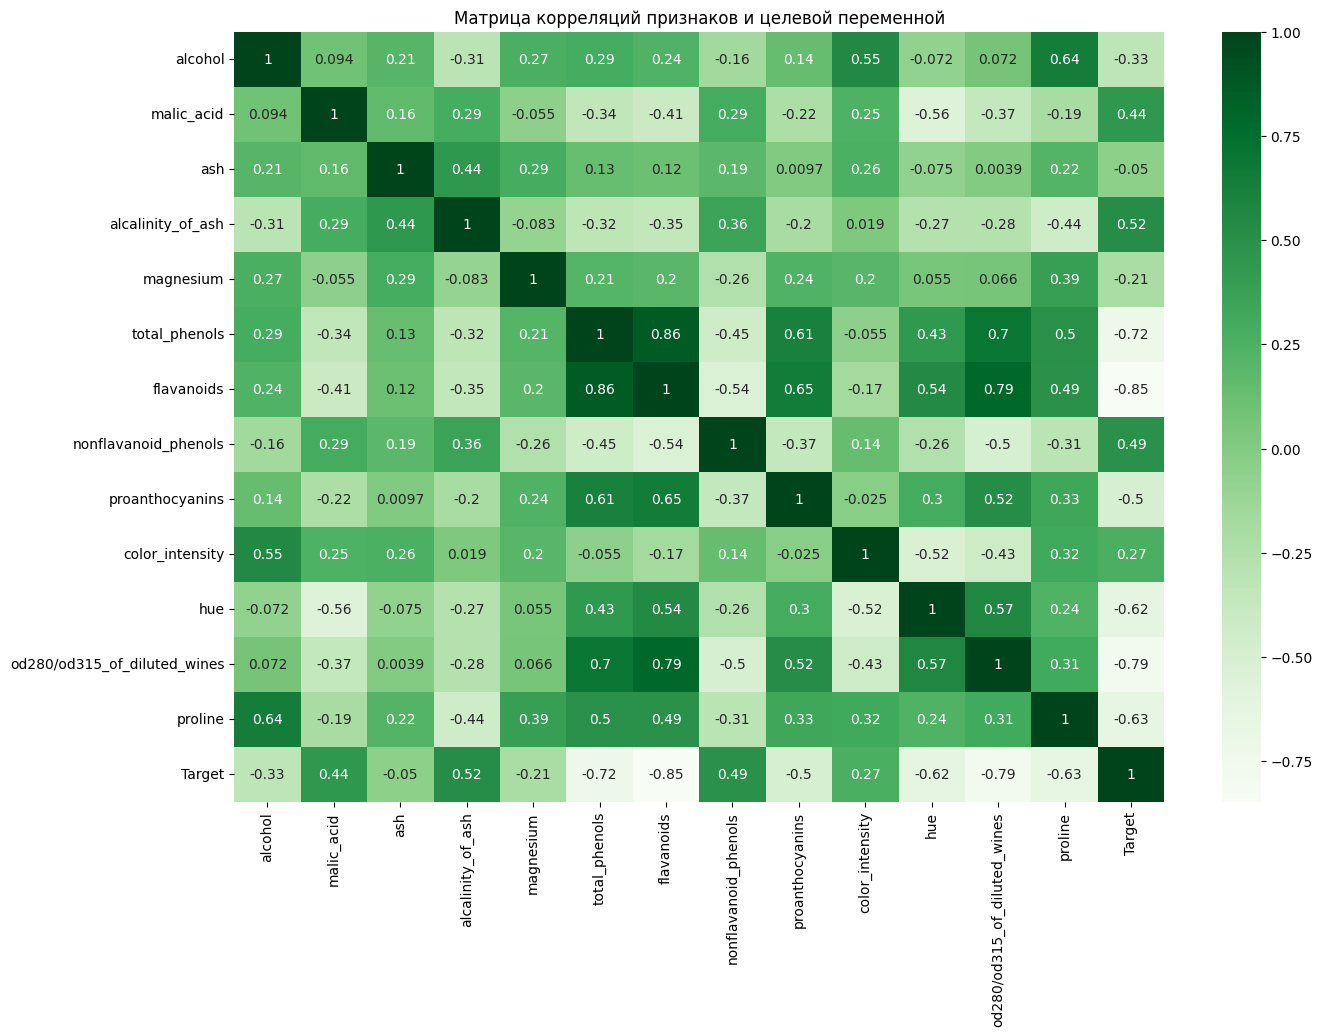

На тепловой карте корреляций мы видим, что признаки 'Flavanoids' и 'od280/od315_of_diluted_wines'
имеют самые сильные абсолютные значения корреляции с 'Target'. Т.е. мы можем использовать эти
два признака в качестве альтернативы методу главных компонент. Но лучше это проверить на практике:
т.е. построить две модели и выбрать какая лучше. Но по заданию, мы должны использовать PCA
--------------------------------------------------
Данные после PCA - первые 5 строк:
   Principal Component 1  Principal Component 2  Target
0             318.562979              21.492131       0
1             303.097420              -5.364718       0
2             438.061133              -6.537309       0
3             733.240139               0.192729       0
4             -11.571428              18.489995       0
--------------------------------------------------
Объясненная дисперсия каждой компонентой: [0.99809123 0.00173592]
Общая объясненная дисперсия первыми 2 компонентами: 1.00
----------------------

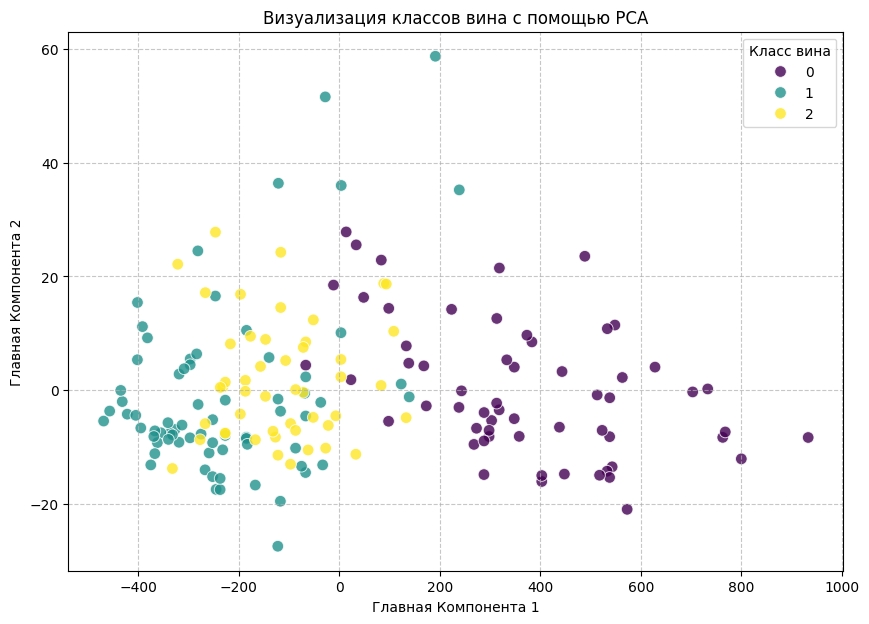

In [1]:
# Импорт и установка библиотек
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine 

# Загрузка данных
data = load_wine()
# Создаем датасет признаков и добавляем к нему целевую переменную
df_wine = pd.DataFrame(data.data, columns=data.feature_names)
df_wine['Target'] = data.target

# 1. Разведочный анализ данных (EDA)
# Первые 5 строк
print("Первые пять строк:\n", df_wine.head())
print("-" * 50)

# Объем памяти, котрый занимает датасет
memory_b = df_wine.memory_usage(deep=True).sum()
memory_kb = memory_b / 1024
memory_mb = memory_kb / 1024
print('Объем памяти, который занимает дадасет:')
print('Объем памяти в байтах: {:03.3f} B'.format(memory_b))
print('Объем памяти в килобайтах: {:03.3f} KB'.format(memory_kb))
print('Объем памяти в мегабайтах: {:03.3f} MB'.format(memory_mb))
print("-" * 50)

# Количество строк и столбцов
num_rows = df_wine.shape[0]
num_columns = df_wine.shape[1]
print('Количество строк и столбцов:')
print('Количество строк:', num_rows)
print('Количество столбцов:', num_columns)
print("-" * 50)

# Минимум (min), максимум (max), среднее (mean), медиана (50%) для всех признаков
print('Минимум (min), максимум (max), среднее (mean), медиана (50%) для всех признаков:')
print(df_wine.describe().loc[['mean', 'min', 'max', '50%']])
print("-" * 50)

# 2. Выведем количество пропущенных значений в каждом столбце
print('Количество пропущенных значений в каждом столбце:')
print(df_wine.isna().sum())
print('Как видим, пропущенные значения в наших данных отсутствуют')
print("-" * 50)

# Посторим тепловую карту линейной корреляции
plt.figure(figsize=(15, 10))
sns.heatmap(df_wine.corr(), annot=True, cmap="Greens")
plt.title('Матрица корреляций признаков и целевой переменной')
plt.show()
print("На тепловой карте корреляций мы видим, что признаки 'Flavanoids' и 'od280/od315_of_diluted_wines'")
print("имеют самые сильные абсолютные значения корреляции с 'Target'. Т.е. мы можем использовать эти")
print("два признака в качестве альтернативы методу главных компонент. Но лучше это проверить на практике:")
print("т.е. построить две модели и выбрать какая лучше. Но по заданию, мы должны использовать PCA")
print("-" * 50)

# 3. Уменьшение размерности с помощью PCA до 2 компонент
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data.data)
df_wine_pca = pd.DataFrame(data_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_wine_pca['Target'] = data.target
print('Данные после PCA - первые 5 строк:')
print(df_wine_pca.head())
print("-" * 50)

# 4. Доля объясненной дисперсии
print(f"Объясненная дисперсия каждой компонентой: {pca.explained_variance_ratio_}")
print(f"Общая объясненная дисперсия первыми 2 компонентами: {pca.explained_variance_ratio_.sum():.2f}")
print("-" * 50)

# 3. Визуализация
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Target', data=df_wine_pca, palette='viridis', s=70, alpha=0.8)
plt.title('Визуализация классов вина с помощью PCA')
plt.xlabel('Главная Компонента 1')
plt.ylabel('Главная Компонента 2')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Класс вина')
plt.show()

Вывод:

Мы уменьшили количество признаков до двух используя метод главных компонент.

Общая объясненная дисперсия первыми 2 компонентами: 1.00 

Это значит, что PCA смог уменьшить количество признаков с 13 до 2, сохранив при этом 100% информации.
Данные более-менее сгруппировались по кластерам, но для более четкого разделения по кластерам необходима улучшенная предварительная обработка данных, например стандартизация данных. Но это не входит в условие текущего задания

   Principal Component 1  Principal Component 2  Target
0               3.316751               1.443463       0
1               2.209465              -0.333393       0
2               2.516740               1.031151       0
3               3.757066               2.756372       0
4               1.008908               0.869831       0
Объясненная дисперсия каждой компонентой: [0.36198848 0.1920749 ]
Общая объясненная дисперсия первыми 2 компонентами: 0.55


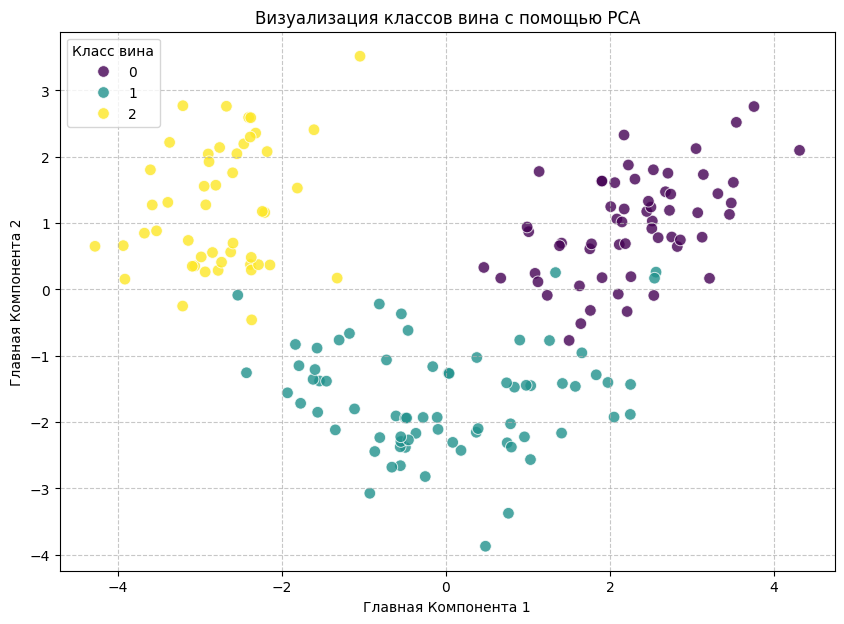

In [2]:
# В качестве эксперимента  выполним стандартизацию данных
from sklearn.preprocessing import StandardScaler

# Стандартизация данных
scaler = StandardScaler()
scaler.fit(data.data)
wine_scaled = scaler.transform(data.data)

# Применение PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(wine_scaled)
df_wine_pca = pd.DataFrame(data_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_wine_pca['Target'] = data.target
print(df_wine_pca.head())
print(f"Объясненная дисперсия каждой компонентой: {pca.explained_variance_ratio_}")
print(f"Общая объясненная дисперсия первыми 2 компонентами: {pca.explained_variance_ratio_.sum():.2f}")

# 3. Визуализация
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Target', data=df_wine_pca, palette='viridis', s=70, alpha=0.8)
plt.title('Визуализация классов вина с помощью PCA')
plt.xlabel('Главная Компонента 1')
plt.ylabel('Главная Компонента 2')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Класс вина')
plt.show()

Вывод:

Используя стандартизацию данных, а затем PCA, мы видим, что разделение по кластерам стало более четким, но при этом общая объясненная дисперсия 2 компонентами составляет 55 % 